Copyright (C) 2021 Stefanie Molin
Licence MIT
git@github.com: stefmolin / pandas-workshop.git

# Classeur

Utilisez ce cahier pour terminer les exercices tout au long de l'atelier.

In [1]:
import urllib.request
# Please execute this at the start of the notebook

base_url = 'https://raw.githubusercontent.com/Aenori/20221024_public/main/help_files/pandas/'
helper_files = ['2019_Yellow_Taxi_Trip_Data.csv', 'Meteorite_Landings.csv', 'tsa_melted_holiday_travel.csv']

for helper_file in helper_files:
    urllib.request.urlretrieve(base_url + helper_file, helper_file)

taxi_file, meteorite_file, holiday_file = helper_files

### Section 1

#### Exercice 1.1
##### Créez un DataFrame en lisant dans le fichier `2019_YELL_TAXI_TRIP_DATA.csv`. Examinez les 5 premières lignes.

In [2]:
import pandas as pd
df_taxi = pd.read_csv(taxi_file)
df_taxi.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


<AxesSubplot:>

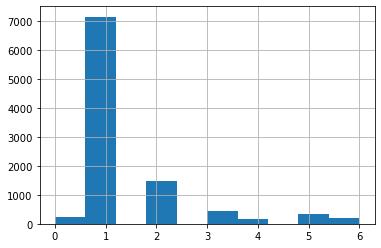

In [22]:
df_taxi['passenger_count'].hist()

#### Exercice 1.2
##### Trouvez les dimensions (nombre de lignes et nombre de colonnes) dans les données.

In [5]:
df_taxi.shape

(10000, 18)

#### Exercice 1.3
##### À l'aide des données dans le fichier `2019_Yellow_Taxi_Trip_data.csv`, calculez les statistiques de résumé pour les colonnes` fare_amount`, `TIP_AMOUNT`,` Tolls_amount` et `Total_amount`.

In [7]:
df_taxi[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercice 1.4
##### isoler le `fare_amount`,` TIP_AMOUNT`, `Tolls_amount` et` Total_amount` pour le plus long voyage par distance (`Trip_Distance`).

In [15]:
df_taxi.loc[df_taxi['trip_distance'].idxmax(), ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

In [24]:
df_taxi[df_taxi['fare_amount'] > df_taxi['fare_amount'].mean()]['trip_distance'].mean()

7.588532347504614

In [25]:
df_taxi[df_taxi['fare_amount'] < df_taxi['fare_amount'].mean()]['trip_distance'].mean()

1.3194681288553831

#### Exercice 1.5
##### Qu'est-ce que le vendorid qui fait le plus de pourboire (colonne `TIP_AMOUNT`) en moyenne? Au total ?

#### Exercice 1.6
##### Quelle est la distance moyenne (`TRIP_DISTANCE`) de la première moitié du DATA_FRAME? De la seconde moitié?

In [19]:
nbrow, nbcol = df_taxi.shape
df_taxi.loc[:nbrow//2, 'trip_distance'].mean()

2.9037012597480514

In [20]:
nbrow, nbcol = df_taxi.shape
df_taxi.loc[nbrow//2:, 'trip_distance'].mean()

3.1265340000000057

#### Exercice 1.7
##### Qui est le conducteur le plus rapide? (Meilleure vitesse moyenne, en fonction du temps de ramassage, du temps de dépôt et de la distance)

#### Exercice 1.8
##### Quel est le nombre le plus intéressant de passager en durée de la pointe moyenne par passager? En termes de pointe moyenne?

#### Exercice 1.9
##### Quelle est la meilleure heure de la journée pour obtenir un bon conseil?

---

### Section 2

#### Exercice 2.1
##### Lire dans les données de météorite du fichier `meteorite_landings.csv`, renommez la colonne` masse (g) `à` masse` et déposez toutes les colonnes de latitude et de longitude. Triez le résultat par masse dans l'ordre descendant.

#### Exercice 2.2
##### À l'aide des données de météorite du fichier `meteorite_landings.csv`, mettez à jour la colonne` `Année 'pour ne contenir que l'année, convertir en un type de données numériques et créer une nouvelle colonne indiquant si la météorite a été observée en chute Avant 1970. Réglez l'index sur la colonne `id` et extraire toutes les lignes avec des ID entre 10 036 et 10 040 (inclusives) avec` loc [] '.

###### ** Astuce 1 **: Utilisez `an.str.slice ()` pour saisir une sous-chaîne.

###### ** Astuce 2 **: Assurez-vous de trier l'index avant d'utiliser `loc []` pour sélectionner la plage.

###### ** Bonus **: Il y a une erreur de saisie de données dans la colonne `` Année '. Peux-tu le trouver? (Ne passez pas trop de temps là-dessus.)

#### Exercice 2.3
##### À l'aide des données de météorite du fichier `meteorite_landings.csv`, créez une table de pivot qui montre à la fois le nombre de météorites et le 95e centile de masse de météorite pour ceux qui ont été trouvés par rapport à la chute par an de 2005 à 2009 (compris). Astuce: assurez-vous de convertir la colonne «Année» en un certain nombre comme nous l'avons fait dans l'exercice précédent.

#### Exercice 2.4
##### À l'aide des données de météorite du fichier `meteorite_landings.csv`, comparez les statistiques sommaires de la colonne de masse pour les météorites qui ont été trouvées par rapport à la chute observée.

#### Exercice 2.5
##### À l'aide des données de voyage en taxi dans le fichier `2019_Yellow_Taxi_Trip_data.csv`, rééchantillonnez les données à une fréquence horaire basée sur le temps de dépôt. Calculez le «Trip_Distance» total, «fare_amount», `tolls_amount» et `Tip_amount», puis trouvez les 5 heures avec le plus de conseils.

---

### Section 3

#### Exercice 3.1
##### À l'aide des données de débit TSA Traveler dans le fichier `TSA_MELTED_HOLIDEY_TRALL.CSV`, créez des diagrammes de boîte pour le débit des voyageurs pour chaque année dans les données. Astuce: passez `kind = 'box' 'dans la méthode` tracé () `pour générer des tracés de boîte.

#### Exercice 3.2
##### À l'aide des données de débit TSA Traveler dans le fichier `TSA_MELTED_HOLIDEY_TRALLAL.CSV`, créez une carte thermique qui montre le débit de voyageur médian TSA 2019 au jour de la semaine et du mois.

#### Exercice 3.3
##### Annoter les médians dans le tracé de la boîte de * [Exercice 3.1] (# Exercice-3.1) *. Astuce: les coordonnées «X» seront respectivement de 1, 2 et 3 pour 2019, 2020 et 2021. Alternativement, pour éviter les valeurs de codage rigide, vous pouvez utiliser la méthode `axes.get_xtickLabels ()`, auquel cas vous devez consulter la [documentation] (https://matplotlib.org/stable/api/text_api.html) pour le Classe de «texte».